# Problema

- Um exercício sobre o problema de uma empresa de cartão de crédito, com um dataset de dados demográficos e financeiros dos últimos 6 meses (amostra de 30.000 linhas). Cada conta é uma linha).

- As linhas são rotuladas de acordo com como se no mês seguinte ao período de dados histórico de seis meses um proprietário da conta ficou inadimplente no próximo mês.

-> **Arquivo original: http://archive.ics.edu/ml**

## Objetivo

Prever se uma conta ficará inadimplente no próximo mês, de acordo com os dados demográficos e históricos.

### Iniciando a Exploração

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

In [2]:
df = pd.read_excel('E:/ProjetosGitHub/1.CartaodeCredito/cartaoAnalise/default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
#Valores Exclusivos
df['ID'].nunique()

29687

In [6]:
#Linhas totais
df.shape

(30000, 25)

In [7]:
#Indicativo de registros duplicados
id_counts = df['ID'].value_counts()
id_counts.head()

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: count, dtype: int64

In [8]:
#Exibindo numero de entradas Duplicadas
id_counts.value_counts()

count
1    29374
2      313
Name: count, dtype: int64

In [9]:
#vamos travar a aleatoriedade, para reproduzir os resultados
np.random.seed(seed=24)

### Teste para Identificação de Duplicados

In [10]:
#Geraremos 100 inteiros aleatórios  selecionados entre 1 e 5
random_integers = np.random.randint(low=1,high=5,size=100) 

In [11]:
random_integers[:5]

array([3, 4, 1, 4, 2])

In [12]:
#se quisessemos conhecer os locais de todos os elementos igual a 3 teríamos:
is_equal_to_3 = random_integers ==3
is_equal_to_3[:5]

array([ True, False, False, False, False])

In [13]:
#se quisessemos saber quantos elementos igual a 3:
sum(is_equal_to_3)

22

In [14]:
#faz sentido pq a aleatoriedade fica proxima a 20% das vezes

In [15]:
random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

### Retomando a Exploração

In [16]:
#Atribuiremos os IDS duplicados a uma variável chamada dupe_mask
dupe_mask = id_counts == 2
dupe_mask[0:5]

ID
ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: count, dtype: bool

In [17]:
id_counts.index[0:5]

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9'],
      dtype='object', name='ID')

In [18]:
#Vamos armazenar os ID Duplicados em uma nova variável
dupe_ids = id_counts.index[dupe_mask]

In [19]:
#convertendo em lista
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [20]:
dupe_ids[0:5]

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

In [21]:
dupe_ids[0:3]

['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8']

In [22]:
#Cada ID Duplicado parece ter uma linha de dados válidos e outra com zeros 
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Examinando os Dados e IDs Duplicados

In [23]:
#Uma abordagem para esse problema é seria encontrar as linhas que só tem zeros.
#Podemos encontrar as entradas do data frame que são iguais a zero criando uma matriz boleana.
df_zero_mask = df == 0

In [24]:
#vamos indexar  df_zero_mask usando(.iloc)
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [25]:
#Somando a série Boleana
sum(feature_zero_mask)

315

In [26]:
#Vamos limpar o DataFrame eliminando as linhas só com zeros, exceto pelo id
#Vamos salvar em um novo dataframe
#~ usamos o tio para a instrução not null - todas as linhas que não tenham zeros.
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [27]:
df_clean_1.shape

(29685, 25)

In [28]:
#Vamos consultar novamente os dados únicos:
df_clean_1['ID'].nunique()

29685

In [29]:
#Eliminamos com sucesso as duplicadas

## Explorando e Limpando os dados

Como foi identificado o problema na qualidade dos dados relacionado aos dados. Onde recebemos a informação de que cada amostra de nosso dataset corresponderia a um ID de conta exclusiva, o que não ocorreu. Com a indexação lógica usamos o Pandas para resolver o problema. 
Vamos examinar agora os valores das caracteristicas e da resposta, os dados que usaremos para desenvolver nosso modelo preditivo.

In [30]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


In [31]:
#A maioria das colunas exibe int64, indicando que tem o tipo de dado interger e é esperado, com a informação de dados, que seja um inteiro.
# No entanto temos um valor "0" não específicado na escala de informações  
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

**Os dados mostrados na coluna 'PAY_1' são o status de pagamento da fatura mensal mais recente. Os valores "0" não estão 
documentados no dicionario de dados.*

#### Escalas
- -1 = pagamento pontual;
-  1 = atraso de 1 mês no pagamento;
-  2 = atraso de 2 meses no pagamento;
-  8 = atraso de o meses no pagamento;


In [32]:
# aqui observamos que há  a presença de 2 valores não documentados 0 e -2.
# Há uma string "Not available" presente na coluna simbolizando dados ausentes.
df_clean_1['PAY_1'].value_counts()


PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

In [33]:
#Vamos encontrar todas as linhas que não tem valor ausente para as características de PAY_1
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [34]:
#Vamos verificar quantas linhas não tem dados ausentes, calculando a soma das mascaras:
#26.664 linhas não tem valor 'Not available'
sum(valid_pay_1_mask)

26664

In [35]:
#Vamos selecionar as informações sem os dados ausentes das linhas PAY_1
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
df_clean_2.shape

(26664, 25)

In [36]:
#Confirmando que os valores indesejados foram retirados ('Not Available')
df_clean_2['PAY_1'].value_counts()

PAY_1
0     13087
-1     5047
1      3261
-2     2476
2      2378
3       292
4        63
5        23
8        17
6        11
7         9
Name: count, dtype: int64

In [37]:
#Chegou a hora de converter o tipo de 'object' para 'int64'
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB



**Obs: Criamos um banco de dados limpo , mas não podemos esquecer que os valores não documentados -2 e 0 em PAY_1 continuam.**

Supondo que entramos em contato novamente com os sócios da empresa e nos fosse dada a seguinte informação:
- -2 significa que a conta começou o mês sem valor a ser pago e o crédito não foi usado.
- -1 significa que a conta usou um valor que foi totalmente pago.
- 0 significa que o pagamento mínimo foi feito, mas o saldo total devedor não foi pago (isto é, uma parcela do saldo devedor foi transportado para o próximo mês)  

## Exploração e garantia da qualidade dos dados 

Até aqui foram resolvidos dois problemas de qualidade de dados com as perguntas básicas e examinando o resumo de info(). Vamos examinar agora as primeiras colunas. Antes de chegarmos ao pagamento histórico de pagamento de faturas, temos os limites de crédito das contas em LIMIT_BAL, e as caracteristicas demográficas EDUCATION, MARRIEAGE e AGE.
- Limite de crédito e caracteristicas estárias;
- Caracteristicas categóricas de instrução e estado civil para ver se os valores fazem sentido;

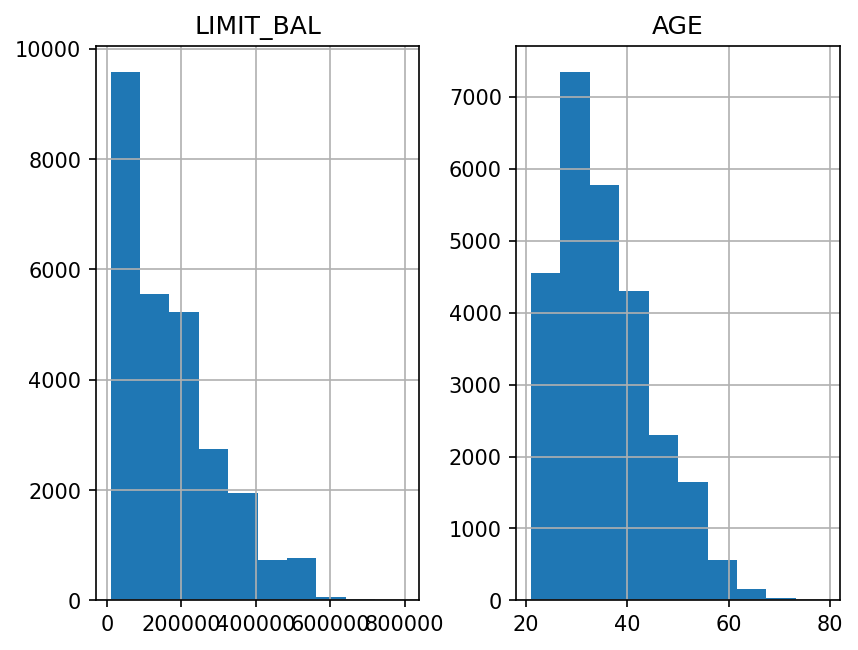

In [38]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()
plt.show()

In [39]:
#Analisando a síntese estatíticas de dados e limite de crédito e idade. (inclui a contagem de não nulos)
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [40]:
#Contagem das caracteristicas de 'EDUCATION' para encontrarmos o nivel de escolaridade.
#Aqui verificamos graus de instrução não documentados: 0, 5 e 6.
#Os documentados são: (1=Pós-Graduação; 2=Universidade; 3=Ensino Médio; 4=Outros)
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

In [42]:
#Vamos agrupar o não documentados na categoria "Outros", já que os valores dos não documentados não são relevantes.
df_clean_2['EDUCATION'] = df_clean_2['EDUCATION'].replace(to_replace=[0, 5 , 6], value=4)
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [44]:
#Contagem das caracteristicas de 'Married'
#Catálogo: MARRIAGE - (1=casado; 2=Solteiro; 3=Outros)
#Há um mesmo problema, um valor "0", que não está documentadono dicionário de dados.
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

In [45]:
#Vamos colocar o valor "0" em outros, conforme fizemos em "Education".
df_clean_2['MARRIAGE'] = df_clean_2['MARRIAGE'].replace(to_replace=0, value=3)
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64